# Librairies

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# EDA

In [2]:
# Load the data
df = pd.read_csv('data/music_dataset_mod.csv')

In [3]:
# Observe the dataset
df_music_realistic = df.copy()
df_music_realistic

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [4]:
# Identifying missing values
missing_values = df_music_realistic.isnull().sum()
missing_values

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [5]:
# Explore how many genres are there in the target column
df_music_realistic['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

Unique genres: ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: Genre, dtype: int64


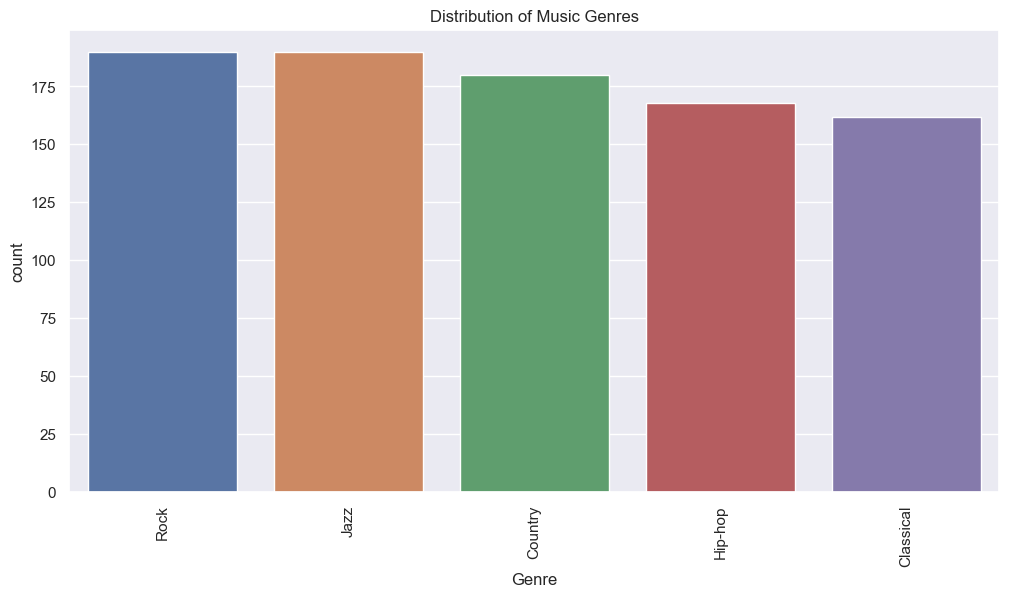

In [6]:
# Examine unique genre after cleaning
unique_genres = df_music_realistic['Genre'].unique()
print(f'Unique genres: {unique_genres}')

# Counting cleaning occurences
genre_counts = df_music_realistic['Genre'].value_counts()
print(genre_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df_music_realistic, order=genre_counts.index)
plt.xticks(rotation=90)
plt.title('Distribution of Music Genres')
plt.show()

Based on the analysis of the music dataset, we have identified the following unique genres: Country, Classical, Rock, Hip-hop, and Jazz. The distribution of tracks across these genres is relatively balanced, as shown below:

- Rock: 190 tracks
- Jazz: 190 tracks
- Country: 180 tracks
- Hip-hop: 168 tracks
- Classical: 162 tracks

This balance is advantageous for model training as it ensures that the predictive model will have an adequate amount of data to learn from each genre. A balanced dataset helps in avoiding biases towards any particular genre and enhances the generalization capability of the model.

# Correlation Analysis

In [7]:
# Remove rows with missing genre labels
df_music_realistic_nonull = df_music_realistic.dropna()
df_music_realistic_nonull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [8]:
# Split the data into features and target
X = df_music_realistic_nonull.drop(columns=['Genre'])
y = df_music_realistic_nonull['Genre']

In [9]:
# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [10]:
df_with_encoded_genre = df_music_realistic_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded
df_with_encoded_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


In [11]:
# Calculate the correlation matrix for the dataframe with numeric Genre values
correlation_matrix = df_with_encoded_genre.corr()

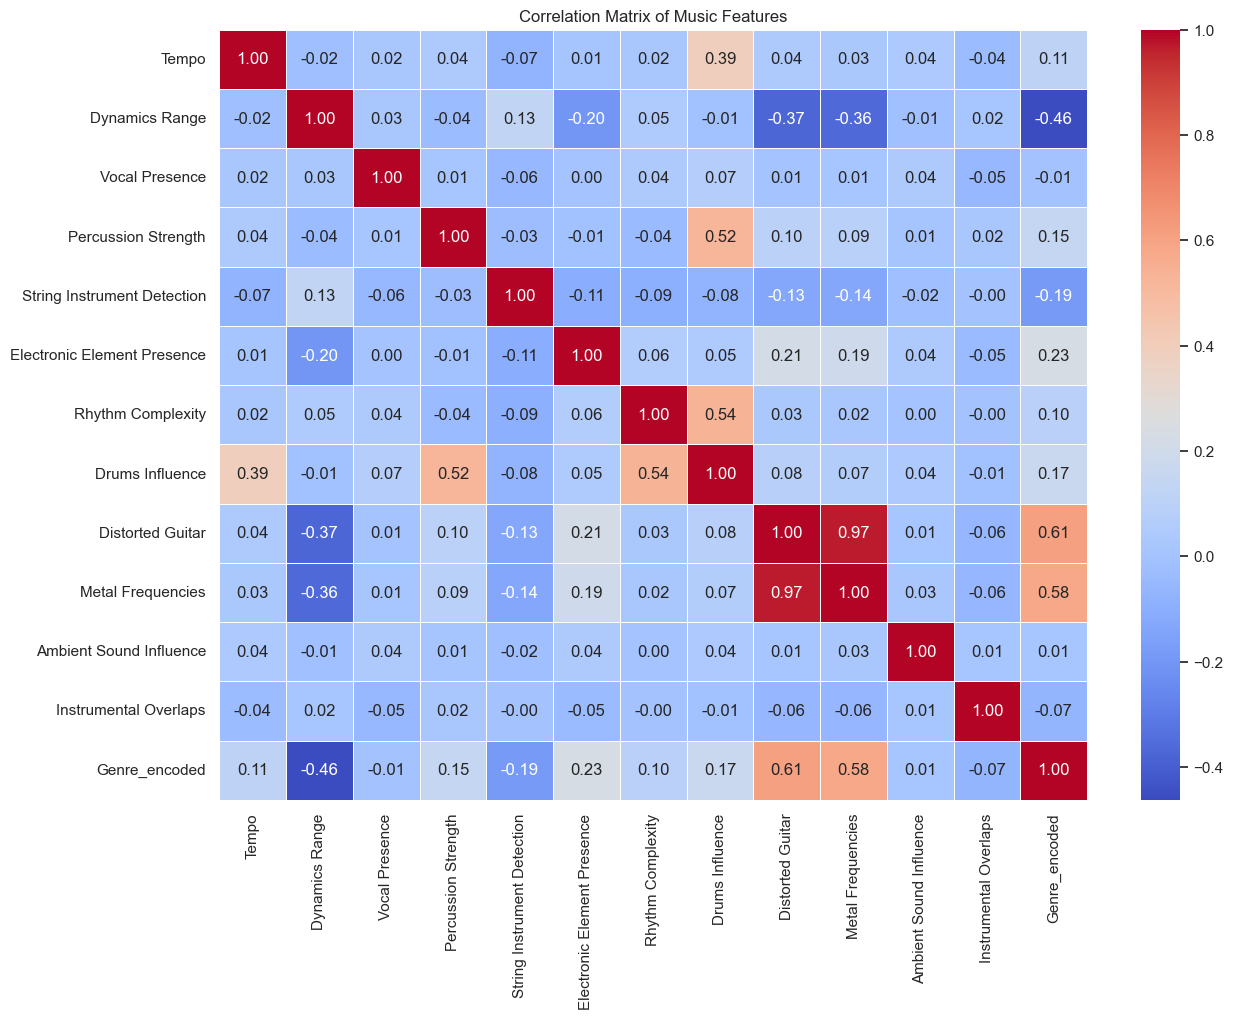

In [12]:
# Correlation matrix
correlation_matrix = df_with_encoded_genre.corr()
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Music Features')
plt.show()

# PCA for dimensionality reduction

In [13]:
# Standartize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

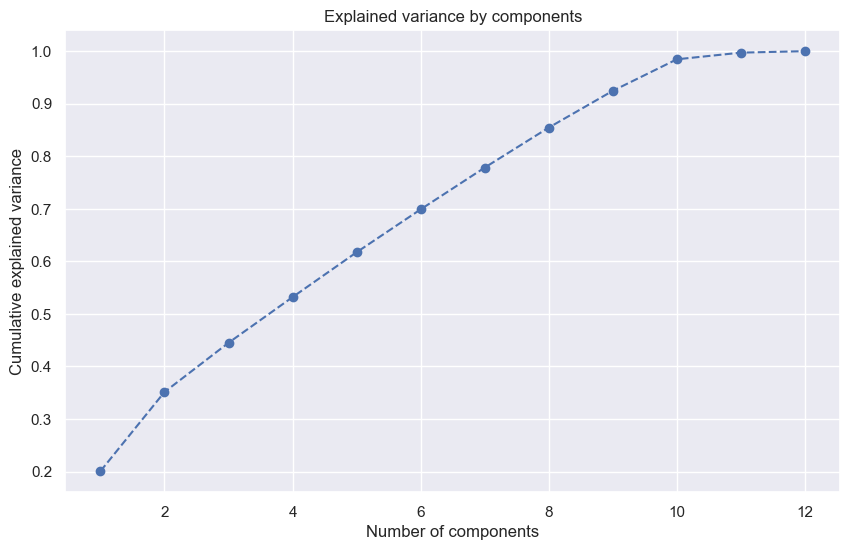

In [16]:
# Cumulative variance - the variance captured up untill a certain component
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [17]:
# Given the PCA results, we can use the first eight principal components
pca = PCA(n_components=8) 
X_pca = pca.fit_transform(X_scaled)

# Evaluating classification efficacity: PCA transformed Vs. Original data

## Logistic regression with principal components

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

In [19]:
# Train a classifier
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
# Predict and evaluate the model
y_pred = classifier.predict(X_test)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy with PCA: 0.5355805243445693

Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



## Logistic regression with original features

In [21]:
# Split the original (non-PCA) data into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [22]:
# Train a Logistic Regression model using original features
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [23]:
# Predict and evaluate the model with original features
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5280898876404494

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



# Genre prediction and integration

In [24]:
df_unknown_genre = df_music_realistic[df_music_realistic['Genre'].isnull()].copy()
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [25]:
# Prepare the data for prediction
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

# Predict the genres
y_unknown_pred = classifier.predict(X_unknown_pca)

In [26]:
# Assign the predicted genres back to the DataFrame
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

In [27]:
# Display the DataFrame with predicted genres
print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


# Questions to challenge the project

**1) Before diving into the analysis, you should address missing data (NaN values) in the dataset. Identifying and handling these is crucial because they can skew your analysis and lead to inaccurate models. How many rows with NaN values are present in the Music Genre Classification dataset?**

In [28]:
nan_rows = df_music_realistic.isnull().sum().sum()
print(f"Number of rows with NaN values: {nan_rows}")

Number of rows with NaN values: 110


**2) In this project, you’re tasked with examining correlations between features because strong correlations can lead to redundancy and affect model performance. For instance, a high correlation between Metal Frequencies and Distorted Guitar might influence prediction outcomes. What is the correlation coefficient between these two features?**

In [29]:
correlation_metal_distorted = df_music_realistic['Metal Frequencies'].corr(df_music_realistic['Distorted Guitar'])
print(f"Correlation coefficient between Metal Frequencies and Distorted Guitar: {correlation_metal_distorted}")

Correlation coefficient between Metal Frequencies and Distorted Guitar: 0.9651041409482595


**3) You must use PCA for dimensionality reduction and determine the number of components that capture significant variance. Capturing at least 80% of the variance is crucial for maintaining model accuracy while simplifying the dataset. What is the minimum number of components that meet this criterion?**

In [30]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()
num_components_80_variance = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f"Number of components needed to capture at least 80% variance: {num_components_80_variance}")

Number of components needed to capture at least 80% variance: 8


**4) Your task involves using logistic regression to compare model accuracy with and without PCA. This comparison is vital to understand whether PCA improves model performance. What accuracy score is achieved with PCA?**

In [31]:
accuracy_with_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")

Accuracy with PCA: 0.5356


**5) As part of the classification report, you must assess the precision scores of your model with and without PCA. Precision is a critical measure of your model's exactness. What is the difference in precision when comparing the use of principal components to that of original features for the 'Hip-hop' class?**

In [32]:
# Assess model with/without PCA
report_with_pca = classification_report(y_test, y_pred, output_dict=True)
y_pred_orig = logreg_orig.predict(X_test_orig)
report_without_pca = classification_report(y_test_orig, y_pred_orig, output_dict=True)

# Map the encoded labels back to their string representations
label_mapping = {i: label for i, label in enumerate(le.classes_)}

# Find the numeric label for 'Hip-hop'
hiphop_label = list(label_mapping.keys())[list(label_mapping.values()).index('Hip-hop')]

# Precision for 'Hip-hop' class with/without PCA
precision_with_pca = report_with_pca[str(hiphop_label)]['precision']
precision_without_pca = report_without_pca[str(hiphop_label)]['precision']
precision_difference = precision_with_pca - precision_without_pca

print(f"Difference in precision for 'Hip-hop' class: {precision_difference:.2f}")

Difference in precision for 'Hip-hop' class: 0.04


**6) The project concludes with you applying the more accurate model to predict unknown genres. This step is fundamental in testing the practical application of your model. What genre does the model predict for track number 992?**

In [33]:
# Predict genres for unknown data
df_unknown_genre = df_music_realistic[df_music_realistic['Genre'].isnull()].copy()
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)
y_unknown_pred = classifier.predict(X_unknown_pca)

# Assign prediction in dataframe
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

# Dsplay genre for track n=992
predicted_genre_992 = df_unknown_genre.loc[992, 'Predicted_Genre']
print(f"Predicted genre for track number 992: {predicted_genre_992}")

Predicted genre for track number 992: Rock


# Conclusion and considerations

**Project Overview:**
This project aimed to classify music tracks into various genres using features derived from the audio data. The dataset included 1000 music tracks, each characterized by attributes such as Tempo, Dynamics Range, Vocal Presence, and several other musical features. Among these tracks, 110 lacked genre labels, necessitating the use of machine learning techniques to predict the missing genres accurately.

**Data Preprocessing and Exploration:**
- Missing values: The dataset initially had 110 missing values in the Genre column.
- Feature correlations: A correlation analysis revealed significant relationships between various features. For example, Metal Frequencies and Distorted Guitar showed a strong correlation, which is consistent with their expected musical characteristics.
- Genre distribution: The dataset exhibited a relatively balanced distribution across five main genres: Rock, Jazz, Country, Hip-hop, and Classical. This balance is advantageous for model training, as it prevents the model from being biased toward any particular genre.

**Dimensionality Reduction with PCA:**
Principal Component Analysis was applied to reduce the dimensionality of the dataset while retaining most of the variance. It was determined that 8 principal components were sufficient to capture over 80% of the data's variance. This reduction helped streamline the model without significant loss of information.

**Model Training and Evaluation:**
Two logistic regression models were trained and evaluated:
- One model with PCA-transformed data: This model achieved an accuracy of 53.56%. The classification report showed a high precision for the 'Classical' genre but lower precision for 'Country' and 'Hip-hop' genres.
- One model with original features: This model achieved a slightly lower accuracy of 52.81%. Similar to the PCA-transformed model, the 'Classical' genre had the highest precision, while 'Country' and 'Hip-hop' had lower precision.

**Precision Analysis:**
The difference in precision for the 'Hip-hop' genre between the two models was analyzed. The PCA-transformed model slightly improved the precision for 'Hip-hop' compared to the model using original features.

**Genre Prediction for Unlabeled Data:**
The PCA-transformed model, which exhibited better overall performance, was used to predict the genres for the 110 tracks with missing labels. For instance, the model predicted 'Rock' as the genre for track number 992.

**Overall conclusion:**
The *"music genre classification project"* successfully demonstrated the application of PCA for dimensionality reduction and its impact on model performance. While PCA helped streamline the dataset and slightly improved the precision for certain genres, the overall accuracy of both models remained close.

**Key takeaways:**

- Balanced dataset: the balanced distribution of genres contributed to more equitable training across classes, reducing potential biases in the model.
- Feature correlation: understanding correlations between features helped in selecting relevant attributes and interpreting model results.
- PCA Effectiveness: PCA proved effective in reducing dimensionality while preserving significant variance, making the model more efficient without substantial loss of accuracy.